In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy.stats import norm
from scipy import stats
import seaborn as sns

# Investigating 2021 Housing Prices (Part 1)

## Introduction:

In the United States, the housing market is a significant component of the economy, influencing household wealth, consumer spending, and employment. Historically, periods of rapid growth in housing prices have been associated with economic expansion, while declines in prices have signaled downturns. Therefore, monitoring housing prices is essential for policymakers, investors, and consumers alike to gauge the health of the economy and make informed decisions.

Housing in Berkeley, California has been of hot discussion for decades. Berkeley's swelling housing prices demonstrate the historical impact of the economy on housing: [housing prices exploded as the Bay Area’s tech-fueled economy roared back from the Great Recession](https://www.berkeleyside.org/2023/10/23/berkeley-affordable-housing-construction).

[Inflation](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/) can have both positive and negative impacts on the housing market. While moderate inflation may stimulate asset appreciation and reduce mortgage debt burdens, high inflation rates can lead to affordability challenges and speculative behavior. Achieving a balance between inflationary pressures and market stability is crucial for fostering a healthy housing market that promotes sustainable growth and equitable access to homeownership.

Thinking critically about the data and findings that underlie policymaking is essential. Transparency in policymaking fosters accountability. By scrutinizing the data behind policies, researchers, advocates, and citizens can hold decision-makers accountable for their choices and advocate for evidence-based interventions that benefit society as a whole.

In this assignment, you will analyze a dataset to assess the potential impact of investments in various sectors on the economy of US cities, particularly focusing on whether specific investments could lead to increased housing prices. As a data scientist hired by a policymaker, your objective is to provide evidence either supporting or challenging the assertions regarding the economic benefits associated with these investments.

In [97]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/school_docs/urap/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)

In [98]:
# Generating synthetic data for number of ice cream shops with added noise
np.random.seed(0)
num_cities = 98
ice_cream_shops = np.random.randint(0, 10, num_cities) + np.random.normal(0, 2, num_cities)

# Adding ice cream shops data to df
df['icecreamshops'] = ice_cream_shops.astype(int)

You will be using the dataset ‘df’ to analyze some of the variables you assessed above to determine where the policymaker should focus their proposals. The dataset contains characteristics for 98 US cities from 2019 to 2021. You will investigate the following variables:


| Variable      | Definition                                           | Source             |
|---------------|------------------------------------------------------|--------------------|
| city          | City name                                            |                    |
| state         | State name                                           |                    |
| pricesept2021 | One bedroom housing price, in USD                   | www.Zumper.com     |
| successteams  | Dummy variable =1 if at least one NBA, NFL, or MLB team in a city had a winning record last season (2020 season), =0 otherwise | Google search |
| violentcrime2019 | Violent crimes (in thousands)                      | FBI                |
| numberbars    | Number of bars, count                               | www.yellowpages.com|
| aqi2020       | Annual 2020 air quality index (AQI)                 | EPA                |
| gdp           | Gross domestic product (billion $)                  | BEA                |
| popuul2019    | 2019 population (in thousands of people)            | FBI                |
| nteams        | Number of major professional sports teams           | Google search      |
| icecreamshops        | Number of ice cream shops           | Google search      |

### Question 1:

Based on the provided list of variables, which factors do you predict would have the largest impact on one-bedroom housing prices in September 2021, and which ones do you expect to have the smallest impact? Please list them in order of largest to smallest impact.

- The number of wins held by an NBA, NFL, or MLB team in the 2020 season
- The number of violent crimes in 2019
- The number of bars in 2021
- The air quality index (AQI) in 2020
- The gross domestic product (GDP) in 2021
- The population in 2019
- The number of major professional sports teams 
- The average household size in 2020
- The number of restaurants in 2021
- The average household salary in 2020
- The number of national parks in 2021
- The number of ice cream shops in 2020

##### Type answer here.

## Sports Teams

The policymaker is a huge fan of sports, and they hypothesize that the cities with at least one sports team win in the 2020 season have higher housing prices than cities without a sports team win in the 2020 season.

Run the following cell to group the dataset by the success of sports teams in each city and plot histograms of one-bedroom housing prices for cities with successful and unsuccessful sports teams. The x-axis represents housing prices in USD, and the y-axis represents frequency.

In [99]:
# Group the dataset by 'successteams'
grouped_data = df.groupby('successteams')

### Question 2:

Plot an overlaid histogram of the distribution of housing prices for cities with successful sports teams and unsuccessful sports teams, respectively.

Feel free to explore matplotlib.pyplot at: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html.

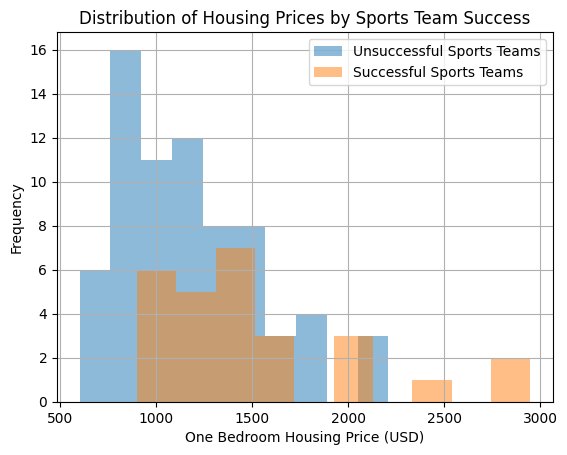

In [100]:
# Type code here:

# SOLUTION:

grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Unsuccessful Sports Teams', 'Successful Sports Teams'])
plt.title('Distribution of Housing Prices by Sports Team Success')
plt.show()

### Question 3:

What do you notice about the housing prices for cities with a successful sports team versus cities without a successful sports team?

##### Type answer here.

Interesting! Let's dig a bit deeper and see how much having a successful sports team in a given city actually impacts the city's housing prices. We want to conduct the following steps in order to analyze the effect size of sports teams' success on housing prices:

1. Start by creating two variables: one for housing prices of cities with no sports teams, and another for housing prices of cities with sports teams. Both of these variables should be Series data.
   
2. Fit [Gaussian distributions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) (hint: use norm.fit(*Series data*)) to each group of housing prices. Calculate the mean (mu_delta) and standard deviation (std_delta) of the each of these distributions.

3. Generate 1,000 random samples from the Gaussian distributions fitted to each group in Step 2. These samples represent hypothetical housing price data based on the distributions observed in the actual data.

4. Calculate the difference between the random samples generated for successful sports teams and unsuccessful sports teams. These differences, or deltas, represent the potential impact of sports team success on housing prices.

5. Fit a Gaussian distribution to the deltas. Calculate the mean (mu_delta) and standard deviation (std_delta) of the deltas distribution. This step helps quantify the average difference in housing prices between cities with successful and unsuccessful sports teams.

6. Calculate the probability that, for any given house, the price increases when the sports team is successful. This probability is derived from the Gaussian distribution of the deltas, indicating the likelihood of observing an increase in housing prices associated with sports team success. Hint: use the function [norm.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to calculate the area to the left of a given datapoint. If we want the area to the right of that same datapoint, what arithmetic can we conduct?

7. Print out the calculated probability and mean of the deltas.

If you find this tricky, feel free to use ChatGPT and/or the provided solutions. These coding concepts won't be tested, but they will give a better intuitive understanding of effect size and they ways in which it can be calculated.

Hint: The mean of the deltas distribution represents the average difference in housing prices between cities with successful sports teams and cities without sports teams. The probability value represents the probability that a randomly chosen house in a city with a successful sports team will have a higher price compared to a house in a city without a successful sports team.

In [101]:
# Type code here:

# SOLUTION

# Select data for successteams = 0 and successteams = 1
no_success = df[df['successteams'] == 0]['pricesept2021']
success = df[df['successteams'] == 1]['pricesept2021']

# Fit Gaussian to data
no_mu, no_std = norm.fit(no_success)
succ_mu, succ_std = norm.fit(success)
    
# Generate random samples from the Gaussian distributions
no_samples = np.random.normal(no_mu, no_std, 1000)
succ_samples = np.random.normal(succ_mu, succ_std, 1000)
    
# Subtract the two arrays to get deltas
deltas = succ_samples - no_samples
    
# Fit Gaussian to the delta
mu_delta, std_delta = norm.fit(deltas)
    
# Calculate probability that for any given house the price increases
probability = 1 - norm.cdf(0, mu_delta, std_delta)
    
# Print probabilities and means
print(f"Probability: {probability}, Mean: {mu_delta}")

Probability: 0.6912345731275822, Mean: 332.02647445161136


In [102]:
from scipy.stats import norm

# Function to calculate probability and mean
def calculate_probability_and_mean(df):
    no_success = df[df['successteams'] == 0]['pricesept2021']
    success = df[df['successteams'] == 1]['pricesept2021']

    # Fit Gaussian to data
    no_mu, no_std = norm.fit(no_success)
    succ_mu, succ_std = norm.fit(success)
    
    # Generate random samples from the Gaussian distributions
    no_samples = np.random.normal(no_mu, no_std, 1000)
    succ_samples = np.random.normal(succ_mu, succ_std, 1000)
    
    # Subtract the two arrays to get deltas
    deltas = succ_samples - no_samples
    
    # Fit Gaussian to the delta
    mu_delta, std_delta = norm.fit(deltas)
    
    # Calculate probability that for any given house the price increases
    probability = 1 - norm.cdf(0, mu_delta, std_delta)
    
    return probability, mu_delta

# Run the simulation multiple times
num_simulations = 1000
probabilities = []
means = []

for _ in range(num_simulations):
    prob, mean = calculate_probability_and_mean(df)
    probabilities.append(prob)
    means.append(mean)

# Calculate standard deviation/variance
prob_std = np.std(probabilities)
prob_variance = np.var(probabilities)
mean_std = np.std(means)
mean_variance = np.var(means)

# Print results
print(f"Probability: Mean = {np.mean(probabilities)}, Std Dev = {prob_std}, Variance = {prob_variance}")
print(f"Mean: Mean = {np.mean(means)}, Std Dev = {mean_std}, Variance = {mean_variance}")

Probability: Mean = 0.697462397444074, Std Dev = 0.012145499508005161, Variance = 0.0001475131582989536
Mean: Mean = 338.2224260857141, Std Dev = 21.37828687773383, Variance = 457.0311498266866


Run the code below to plot the three Gaussian distributions. This can help supplement your understanding of the deltas, mean, and probability values.

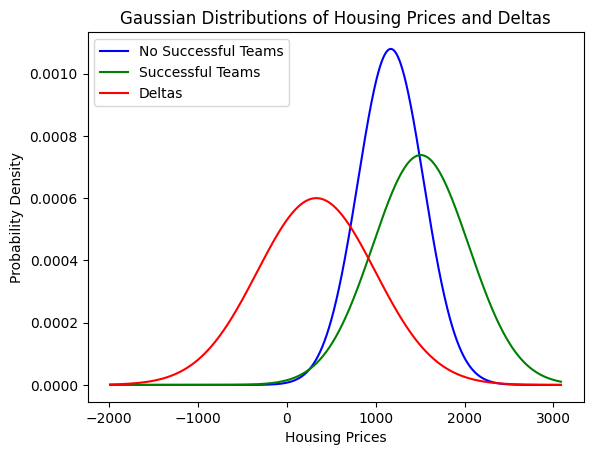

In [103]:
# Plotting the distributions
x = np.linspace(min(no_samples.min(), succ_samples.min(), deltas.min()), 
                max(no_samples.max(), succ_samples.max(), deltas.max()), 1000)

# Plot the Gaussian distribution for no success
plt.plot(x, norm.pdf(x, no_mu, no_std), label='No Successful Teams', color='blue')

# Plot the Gaussian distribution for success
plt.plot(x, norm.pdf(x, succ_mu, succ_std), label='Successful Teams', color='green')

# Plot the Gaussian distribution for deltas
plt.plot(x, norm.pdf(x, mu_delta, std_delta), label='Deltas', color='red')

plt.legend()
plt.xlabel('Housing Prices')
plt.ylabel('Probability Density')
plt.title('Gaussian Distributions of Housing Prices and Deltas')
plt.show()

In [104]:
# Generate data points for plotting the fitted Gaussian distribution
x = np.linspace(mu_delta - 3*std_delta, mu_delta + 3*std_delta, 1000)
pdf = norm.pdf(x, mu_delta, std_delta)

### Question 4:

Plot the fitted Gaussian distribution from the variables **x** and **pdf**, created above. Remember to include labeling for the x and y axes, a title for the plot, and a legend for clarity. 

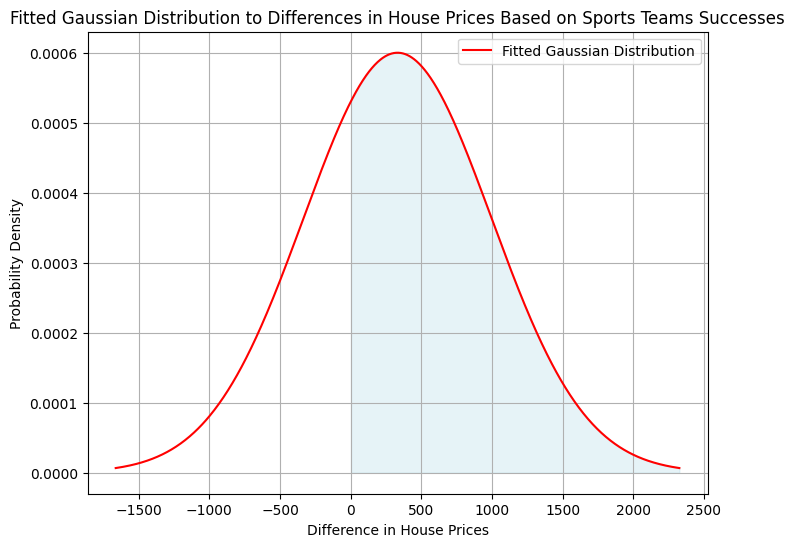

In [105]:
# Type code here:

# SOLUTION

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices Based on Sports Teams Successes')
plt.fill_between(x, pdf, where=(x >= 0), color='lightblue', alpha=0.3)  # Shade the area from 0 onwards
plt.grid(True)
plt.legend()
plt.show()

### Question 5:

What do the variables **probability** and **mean** represent? How can the policymaker use them to gauge the importance of sports teams wins in changing housing prices?

##### Type answer here.

Excited by the these findings, the policymaker wastes no time in planning on drafting key proposals aimed at leveraging the success of sports teams to drive economic growth.

### Question 6:

Draft a proposal for the policymaker to present to the mayor. Feel free to run some exploratory data analyses on the dataset to support your answer.

##### Type answer here.

In [106]:
# OPTIONAL: Feel free to add code here.

The policymaker presents the proposed policy to the mayor, expecting approval, but the mayor is skeptical. "Is the most important thing we should be focusing on...sports?" the mayor questions.


The calculated *probability* and *mean* hold significant importance in understanding the effect size of the relationship between the success of sports teams in a given city and that city's housing prices. 

The probability represents the likelihood that housing prices will increase for any given house when the condition associated with successful teams is present. A higher probability suggests a stronger effect, indicating a greater likelihood of observing an increase in housing prices when teams are successful. 

Additionally, the mean offers a quantitative measure of the average difference in housing prices between successful and unsuccessful teams. A larger mean delta indicates a more substantial effect size, suggesting a greater increase in housing prices associated with successful teams compared to unsuccessful ones. 

Together, these metrics help quantify the effect size of the relationship between team success and housing prices. 

However, the mayor has a valid point. Food for thought: are we investigating correlation or causation? Can we make an informed decision from these calculations? More on this next time!

# Investigating 2021 Housing Prices (Part 2)

In Part 1,  we explored the role of the housing market in the economy and the impact of inflation, focusing on the effect of sports teams' success on housing prices. We used a dataset containing characteristics for 98 US cities from 2019 to 2021 to determine where a policymaker should focus their proposals. Specifically, we investigated the impact of sports teams' success on housing prices and found the mean of the deltas to be ~370 and the probability of any given housing price increasing as a result of sports teams' success to be ~70% (these variables might fluctuate due to the random sampling procedure).

Now, we'll expand this analysis to four more variables: air quality index (AQI), gross domestic product (GDP), number of violent crimes, and number of ice cream shops. 

In [107]:
# Let's read in the data.
file_path = '/Users/mirandashen/Desktop/school_docs/urap/Villas-Boas_2023pset3.dta'
df = pd.read_stata(file_path)

# Generating synthetic data for number of ice cream shops with added noise
np.random.seed(0)
num_cities = 98
ice_cream_shops = np.random.randint(0, 10, num_cities) + np.random.normal(0, 2, num_cities)

# Adding ice cream shops data to df
df['icecreamshops'] = ice_cream_shops.astype(int)

## Ice Cream Shops

Let's start of by assessing the number of ice cream shops of the 98 cities in 2020. Run the cells below to visualize the number of ice cream shops and binarize the variable. Then, calculate the relative increase in housing prices again, this time for a random sample of 1,000 ice cream shop datapoints.

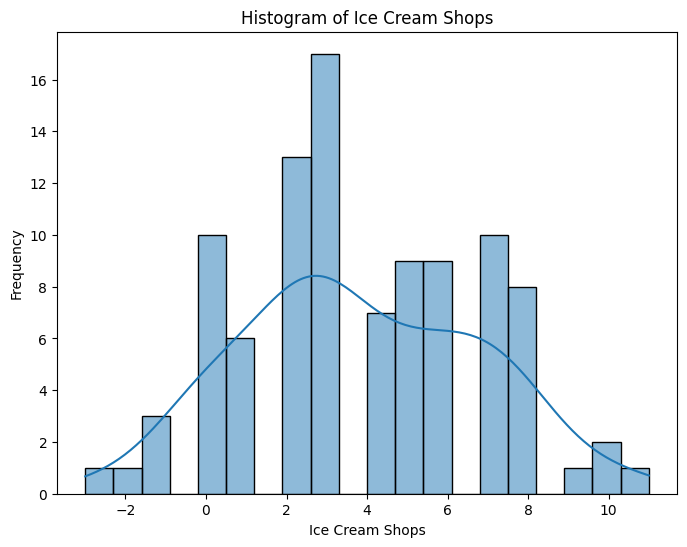

In [108]:
plt.figure(figsize=(8, 6))
sns.histplot(df['icecreamshops'], bins=20, kde=True)
plt.title('Histogram of Ice Cream Shops')
plt.xlabel('Ice Cream Shops')
plt.ylabel('Frequency')
plt.show()

In [109]:
# Binarize ice cream shop variable
df['icecreamshops_binarized'] = (df['icecreamshops'] >= 5).astype(int)

In [110]:
# Group the dataset by 'icecreamshops'
icecreamshops_grouped_data = df.groupby('icecreamshops_binarized')

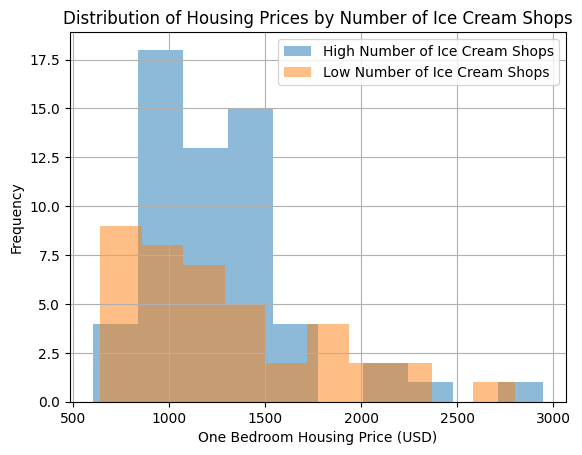

In [111]:
icecreamshops_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['High Number of Ice Cream Shops', 'Low Number of Ice Cream Shops'])
plt.title('Distribution of Housing Prices by Number of Ice Cream Shops')
plt.show()

In [112]:
# Select data for aqi2020_binarized = 0 and aqi2020_binarized = 1
low_ice_cream = df[df['icecreamshops_binarized'] == 0]['pricesept2021']
high_ice_cream = df[df['icecreamshops_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
bad_mu, bad_std = norm.fit(low_ice_cream)
good_mu, good_std = norm.fit(high_ice_cream)
    
# Generate random samples from the Gaussian distributions
bad_samples = np.random.normal(bad_mu, bad_std, 1000)
good_samples = np.random.normal(good_mu, good_std, 1000)
    
# Subtract the two arrays to get deltas
ice_cream_deltas = good_samples - bad_samples
    
# Fit Gaussian to the delta
ice_cream_mu_delta, ice_cream_std_delta = norm.fit(ice_cream_deltas)
    
# Calculate probability that for any given house the price increases
ice_cream_probability = 1 - norm.cdf(0, ice_cream_mu_delta, ice_cream_std_delta)
    
# Print probabilities and means
print(f"Probability: {ice_cream_probability}, Mean: {ice_cream_mu_delta}")

Probability: 0.523616647939994, Mean: 38.908705982754654


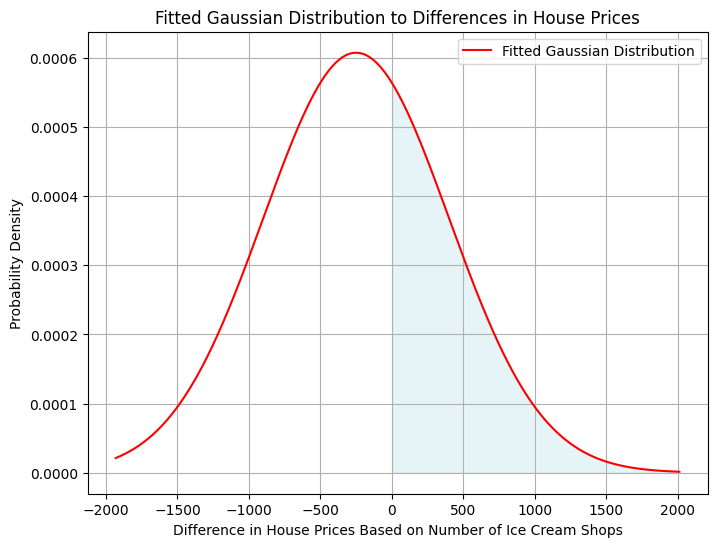

In [113]:
# Generate data points for plotting the fitted Gaussian distribution
ice_cream_x = np.linspace(ice_cream_mu_delta - 3*ice_cream_std_delta, ice_cream_mu_delta + 3*ice_cream_std_delta, 1000)
ice_cream_pdf = norm.pdf(x, ice_cream_mu_delta, ice_cream_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(ice_cream_x, ice_cream_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on Number of Ice Cream Shops')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(ice_cream_x, ice_cream_pdf, where=(ice_cream_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

In [114]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load your dataframe here
# df = pd.read_csv('your_file.csv') # Uncomment this line and provide the correct path to your CSV file

# Function to calculate probability and mean for the given condition
def calculate_probability_and_mean_icecream(df):
    low_ice_cream = df[df['icecreamshops_binarized'] == 0]['pricesept2021']
    high_ice_cream = df[df['icecreamshops_binarized'] == 1]['pricesept2021']

    # Fit Gaussian to data
    bad_mu, bad_std = norm.fit(low_ice_cream)
    good_mu, good_std = norm.fit(high_ice_cream)
    
    # Generate random samples from the Gaussian distributions
    bad_samples = np.random.normal(bad_mu, bad_std, 1000)
    good_samples = np.random.normal(good_mu, good_std, 1000)
    
    # Subtract the two arrays to get deltas
    ice_cream_deltas = good_samples - bad_samples
    
    # Fit Gaussian to the delta
    ice_cream_mu_delta, ice_cream_std_delta = norm.fit(ice_cream_deltas)
    
    # Calculate probability that for any given house the price increases
    ice_cream_probability = 1 - norm.cdf(0, ice_cream_mu_delta, ice_cream_std_delta)
    
    return ice_cream_probability, ice_cream_mu_delta

# Run the simulation multiple times
num_simulations = 1000
ice_cream_probabilities = []
ice_cream_means = []

for _ in range(num_simulations):
    prob, mean = calculate_probability_and_mean_icecream(df)
    ice_cream_probabilities.append(prob)
    ice_cream_means.append(mean)

# Calculate standard deviation/variance
ice_cream_prob_std = np.std(ice_cream_probabilities)
ice_cream_prob_variance = np.var(ice_cream_probabilities)
ice_cream_mean_std = np.std(ice_cream_means)
ice_cream_mean_variance = np.var(ice_cream_means)

# Print results
print(f"Probability: Mean = {np.mean(ice_cream_probabilities)}, Std Dev = {ice_cream_prob_std}, Variance = {ice_cream_prob_variance}")
print(f"Mean: Mean = {np.mean(ice_cream_means)}, Std Dev = {ice_cream_mean_std}, Variance = {ice_cream_mean_variance}")


Probability: Mean = 0.5286313854795582, Std Dev = 0.013089560452406702, Variance = 0.00017133659283720954
Mean: Mean = 46.33662347895204, Std Dev = 21.17804650018593, Variance = 448.5096535640374


Run the code below to run an opposite analysis. That is, let's look at the impact of housing prices on ice cream shops.

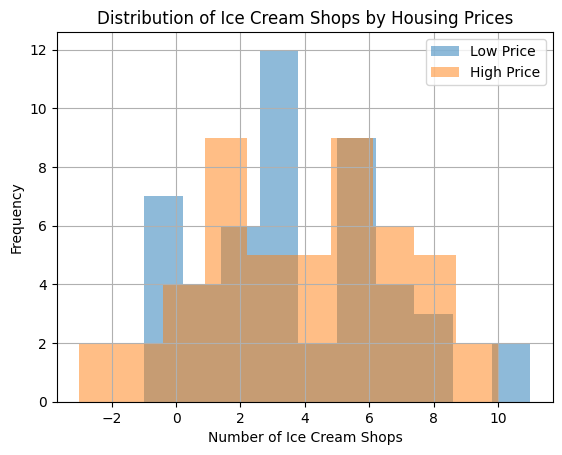

Probability: 0.5031711201953227, Mean: 0.03268944068203004


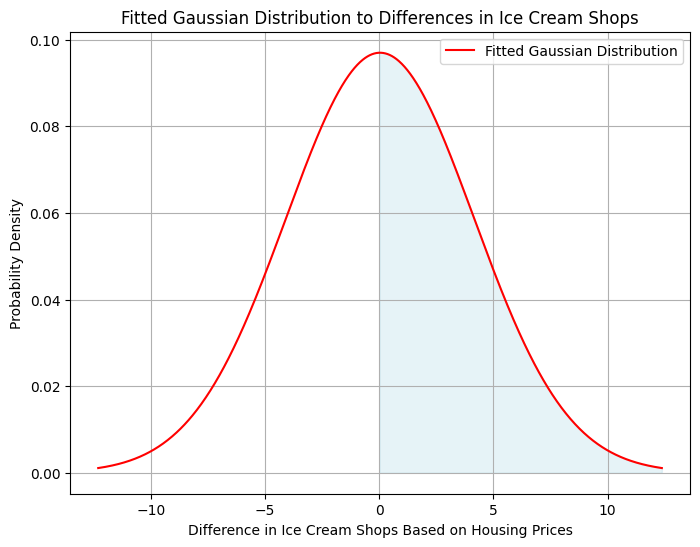

In [115]:
### REVERSE TEST

# Calculate the median of pricesept2021
price_median = df['pricesept2021'].median()

# Binarize pricesept2021 using the median value
df['price_binarized'] = (df['pricesept2021'] >= price_median).astype(int)

# Group the dataset by 'price_binarized'
price_grouped_data = df.groupby('price_binarized')

# Plot histogram for ice cream shops
price_grouped_data['icecreamshops'].hist(alpha=0.5, bins=10)
plt.xlabel('Number of Ice Cream Shops')
plt.ylabel('Frequency')
plt.legend(['Low Price', 'High Price'])
plt.title('Distribution of Ice Cream Shops by Housing Prices')
plt.show()

# Select data for price_binarized = 0 and price_binarized = 1
low_price = df[df['price_binarized'] == 0]['icecreamshops']
high_price = df[df['price_binarized'] == 1]['icecreamshops']

# Fit Gaussian to data
low_price_mu, low_price_std = norm.fit(low_price)
high_price_mu, high_price_std = norm.fit(high_price)

# Generate random samples from the Gaussian distributions
low_price_samples = np.random.normal(low_price_mu, low_price_std, 1000)
high_price_samples = np.random.normal(high_price_mu, high_price_std, 1000)

# Subtract the two arrays to get deltas
price_deltas = high_price_samples - low_price_samples

# Fit Gaussian to the delta
price_mu_delta, price_std_delta = norm.fit(price_deltas)

# Calculate probability that for any given city the number of ice cream shops increases
price_probability = 1 - norm.cdf(0, price_mu_delta, price_std_delta)

# Print probabilities and means
print(f"Probability: {price_probability}, Mean: {price_mu_delta}")

# Generate data points for plotting the fitted Gaussian distribution
price_x = np.linspace(price_mu_delta - 3*price_std_delta, price_mu_delta + 3*price_std_delta, 1000)
price_pdf = norm.pdf(price_x, price_mu_delta, price_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(price_x, price_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in Ice Cream Shops Based on Housing Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in Ice Cream Shops')
plt.fill_between(price_x, price_pdf, where=(price_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()


### Question 7:

In our initial analysis, we explored how the presence of ice cream shops might affect housing prices. 

What might it mean to reverse this analysis and instead examine how housing prices might affect the number of ice cream shops? Compare the visualizations from both analyses and describe how the insights derived from these visualizations might differ.

##### Write answer here.

Before choosing which sector to focus on, the policymaker wants to fully analyze the data we have. 

Let's run even more tests to investigate some additional variables.

## Air Quality Index (AQI)

Run the cells below to repeat the steps above, this time for AQI.

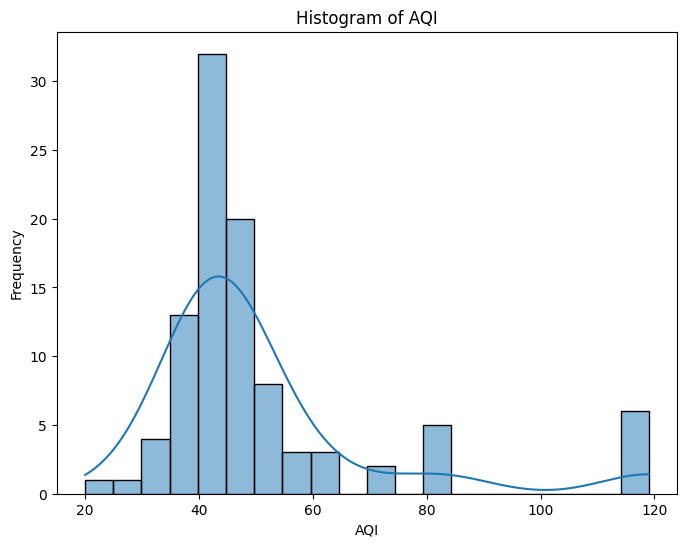

In [116]:
plt.figure(figsize=(8, 6))
sns.histplot(df['aqi2020'], bins=20, kde=True)
plt.title('Histogram of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

The AQI is divided into six categories and ranges from 0 to 500. Each category corresponds to a different level of health concern. Moderate air quality ranges from 51 to 100. Based on this data, let's classify an AQI less than 50 to be "good air" and an AQI greater than or equal to 50 to be "bad air".

Run the cells before to binarize the AQI variable and re-calculate its probability of increasing housing prices and respective mean.

In [117]:
# Binarize AQI variable
df['aqi2020_binarized'] = (df['aqi2020'] >= 50).astype(int)

In [118]:
# Group the dataset by 'aqi2020_binarized'
aqi_grouped_data = df.groupby('aqi2020_binarized')

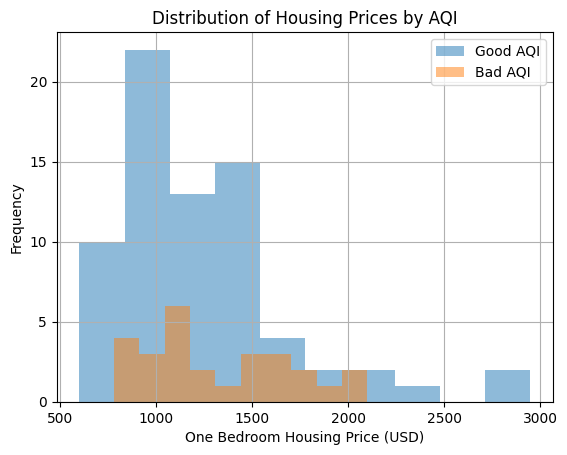

In [119]:
aqi_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Good AQI', 'Bad AQI'])
plt.title('Distribution of Housing Prices by AQI')
plt.show()

In [120]:
# Select data for aqi2020_binarized = 0 and aqi2020_binarized = 1
bad_aqi = df[df['aqi2020_binarized'] == 0]['pricesept2021']
good_aqi = df[df['aqi2020_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
bad_mu, bad_std = norm.fit(bad_aqi)
good_mu, good_std = norm.fit(good_aqi)
    
# Generate random samples from the Gaussian distributions
bad_samples = np.random.normal(bad_mu, bad_std, 1000)
good_samples = np.random.normal(good_mu, good_std, 1000)
    
# Subtract the two arrays to get deltas
aqi_deltas = good_samples - bad_samples
    
# Fit Gaussian to the delta
aqi_mu_delta, aqi_std_delta = norm.fit(aqi_deltas)
    
# Calculate probability that for any given house the price increases
aqi_probability = 1 - norm.cdf(0, aqi_mu_delta, aqi_std_delta)
    
# Print probabilities and means
print(f"Probability: {aqi_probability}, Mean: {aqi_mu_delta}")

Probability: 0.560721828629914, Mean: 92.26631007188317


In [121]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load your dataframe here
# df = pd.read_csv('your_file.csv') # Uncomment this line and provide the correct path to your CSV file

# Function to calculate probability and mean for the given condition
def calculate_probability_and_mean_aqi(df):
    bad_aqi = df[df['aqi2020_binarized'] == 0]['pricesept2021']
    good_aqi = df[df['aqi2020_binarized'] == 1]['pricesept2021']

    # Fit Gaussian to data
    bad_mu, bad_std = norm.fit(bad_aqi)
    good_mu, good_std = norm.fit(good_aqi)
    
    # Generate random samples from the Gaussian distributions
    bad_samples = np.random.normal(bad_mu, bad_std, 1000)
    good_samples = np.random.normal(good_mu, good_std, 1000)
    
    # Subtract the two arrays to get deltas
    aqi_deltas = good_samples - bad_samples
    
    # Fit Gaussian to the delta
    aqi_mu_delta, aqi_std_delta = norm.fit(aqi_deltas)
    
    # Calculate probability that for any given house the price increases
    aqi_probability = 1 - norm.cdf(0, aqi_mu_delta, aqi_std_delta)
    
    return aqi_probability, aqi_mu_delta

# Run the simulation multiple times
num_simulations = 1000
aqi_probabilities = []
aqi_means = []

for _ in range(num_simulations):
    prob, mean = calculate_probability_and_mean_aqi(df)
    aqi_probabilities.append(prob)
    aqi_means.append(mean)

# Calculate standard deviation/variance
aqi_prob_std = np.std(aqi_probabilities)
aqi_prob_variance = np.var(aqi_probabilities)
aqi_mean_std = np.std(aqi_means)
aqi_mean_variance = np.var(aqi_means)

# Print results
print(f"Probability: Mean = {np.mean(aqi_probabilities)}, Std Dev = {aqi_prob_std}, Variance = {aqi_prob_variance}")
print(f"Mean: Mean = {np.mean(aqi_means)}, Std Dev = {aqi_mean_std}, Variance = {aqi_mean_variance}")


Probability: Mean = 0.5585630337511552, Std Dev = 0.011668288557749752, Variance = 0.00013614895786691377
Mean: Mean = 89.1772991968975, Std Dev = 17.8430869819471, Variance = 318.3757530453301


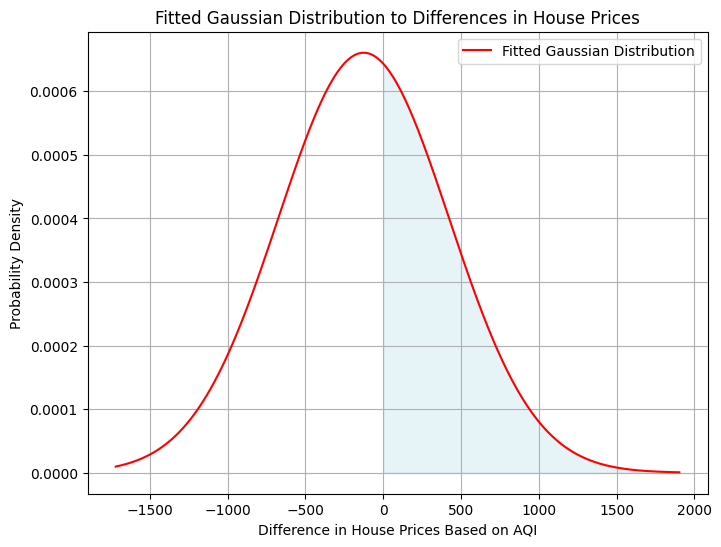

In [122]:
# Generate data points for plotting the fitted Gaussian distribution
aqi_x = np.linspace(aqi_mu_delta - 3*aqi_std_delta, aqi_mu_delta + 3*aqi_std_delta, 1000)
aqi_pdf = norm.pdf(x, aqi_mu_delta, aqi_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(aqi_x, aqi_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on AQI')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(aqi_x, aqi_pdf, where=(aqi_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

## Gross Domestic Product (GDP)

Run the cells below to repeat the steps above, this time for GDP.

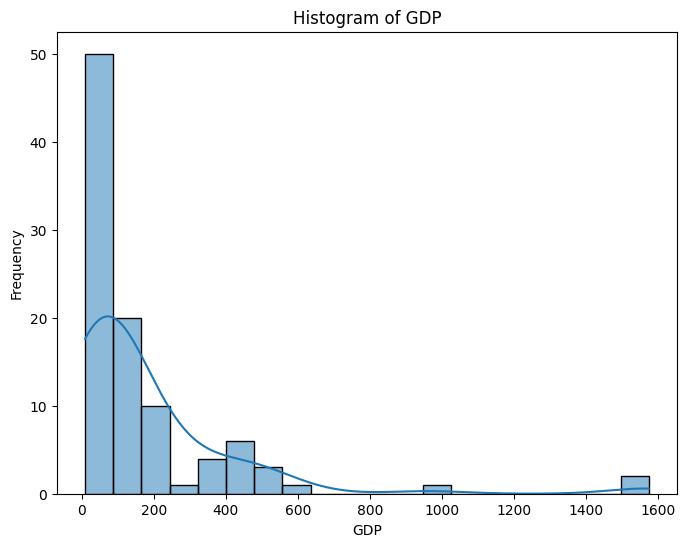

In [123]:
plt.figure(figsize=(8, 6))
sns.histplot(df['gdp'], bins=20, kde=True)
plt.title('Histogram of GDP')
plt.xlabel('GDP')
plt.ylabel('Frequency')
plt.show()

In [124]:
# Binarize GDP
df['gdp_binarized'] = (df['gdp'] >= df['gdp'].median()).astype(int)

In [125]:
# Group the dataset by 'gdp_binarized'
gdp_grouped_data = df.groupby('gdp_binarized')

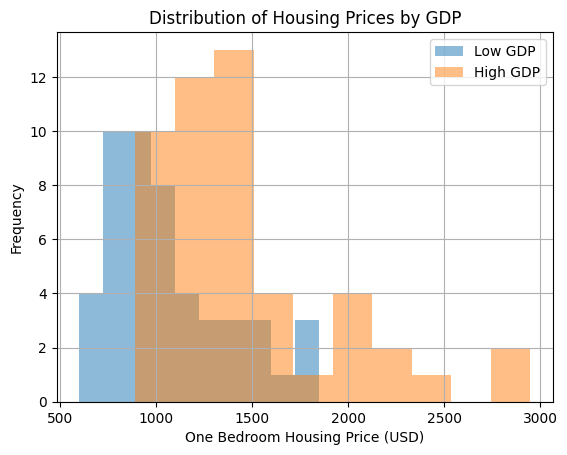

In [126]:
gdp_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low GDP', 'High GDP'])
plt.title('Distribution of Housing Prices by GDP')
plt.show()

In [127]:
# Select data for gdp_binarized = 0 and gdp_binarized = 1
low_gdp = df[df['gdp_binarized'] == 0]['pricesept2021']
high_gdp = df[df['gdp_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_gdp_mu, low_gdp_std = norm.fit(low_gdp)
high_gdp_mu, high_gdp_std = norm.fit(high_gdp)

# Generate random samples from the Gaussian distributions
low_gdp_samples = np.random.normal(low_gdp_mu, low_gdp_std, 1000)
high_gdp_samples = np.random.normal(high_gdp_mu, high_gdp_std, 1000)

# Subtract the two arrays to get deltas
gdp_deltas = high_gdp_samples - low_gdp_samples

# Fit Gaussian to the delta
gdp_mu_delta, gdp_std_delta = norm.fit(gdp_deltas)

# Calculate probability that for any given house the price increases
gdp_probability = 1 - norm.cdf(0, gdp_mu_delta, gdp_std_delta)

# Print probabilities and means
print(f"Probability: {gdp_probability}, Mean: {gdp_mu_delta}")

Probability: 0.7601790754513731, Mean: 410.24184961211984


In [128]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load your dataframe here
# df = pd.read_csv('your_file.csv') # Uncomment this line and provide the correct path to your CSV file

# Function to calculate probability and mean for the given condition
def calculate_probability_and_mean_gdp(df):
    low_gdp = df[df['gdp_binarized'] == 0]['pricesept2021']
    high_gdp = df[df['gdp_binarized'] == 1]['pricesept2021']

    # Fit Gaussian to data
    low_gdp_mu, low_gdp_std = norm.fit(low_gdp)
    high_gdp_mu, high_gdp_std = norm.fit(high_gdp)
    
    # Generate random samples from the Gaussian distributions
    low_gdp_samples = np.random.normal(low_gdp_mu, low_gdp_std, 1000)
    high_gdp_samples = np.random.normal(high_gdp_mu, high_gdp_std, 1000)
    
    # Subtract the two arrays to get deltas
    gdp_deltas = high_gdp_samples - low_gdp_samples
    
    # Fit Gaussian to the delta
    gdp_mu_delta, gdp_std_delta = norm.fit(gdp_deltas)
    
    # Calculate probability that for any given house the price increases
    gdp_probability = 1 - norm.cdf(0, gdp_mu_delta, gdp_std_delta)
    
    return gdp_probability, gdp_mu_delta

# Run the simulation multiple times
num_simulations = 1000
gdp_probabilities = []
gdp_means = []

for _ in range(num_simulations):
    prob, mean = calculate_probability_and_mean_gdp(df)
    gdp_probabilities.append(prob)
    gdp_means.append(mean)

# Calculate standard deviation/variance
gdp_prob_std = np.std(gdp_probabilities)
gdp_prob_variance = np.var(gdp_probabilities)
gdp_mean_std = np.std(gdp_means)
gdp_mean_variance = np.var(gdp_means)

# Print results
print(f"Probability: Mean = {np.mean(gdp_probabilities)}, Std Dev = {gdp_prob_std}, Variance = {gdp_prob_variance}")
print(f"Mean: Mean = {np.mean(gdp_means)}, Std Dev = {gdp_mean_std}, Variance = {gdp_mean_variance}")


Probability: Mean = 0.7599552191655753, Std Dev = 0.01080207364883111, Variance = 0.00011668479511477142
Mean: Mean = 401.3573867566429, Std Dev = 17.45597132791669, Variance = 304.71093500104956


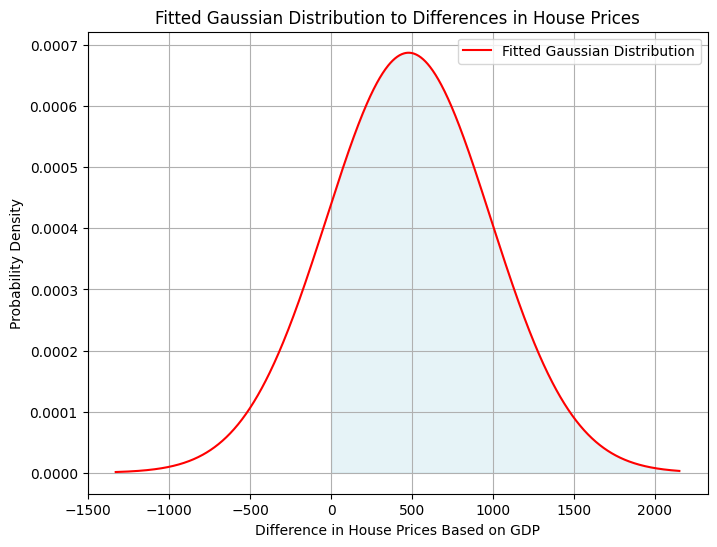

In [129]:
# Generate data points for plotting the fitted Gaussian distribution
gdp_x = np.linspace(gdp_mu_delta - 3*gdp_std_delta, gdp_mu_delta + 3*gdp_std_delta, 1000)
gdp_pdf = norm.pdf(x, gdp_mu_delta, gdp_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(gdp_x, gdp_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on GDP')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(gdp_x, gdp_pdf, where=(gdp_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

Run the code below to again run a reverse analysis, similar to what was done for the ice cream shops variable.

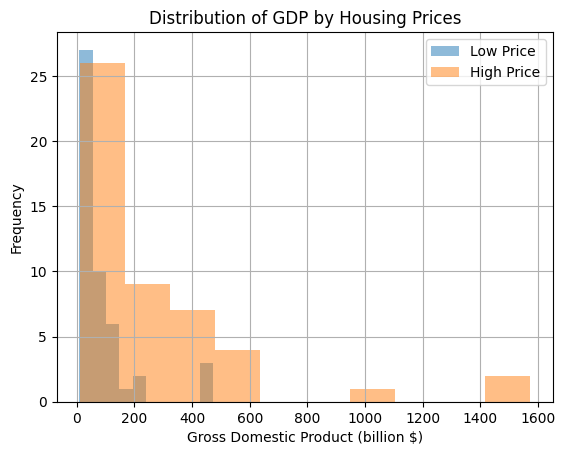

Probability: 0.6869312542033574, Mean: 160.52440309480673


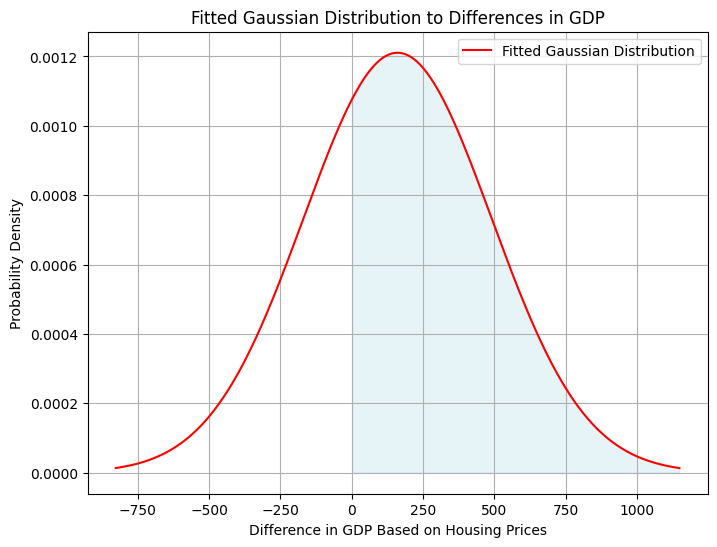

In [130]:
#### REVERSE TEST

# Calculate the median of pricesept2021
price_median = df['pricesept2021'].median()

# Binarize pricesept2021 using the median value
df['price_binarized'] = (df['pricesept2021'] >= price_median).astype(int)

# Group the dataset by 'price_binarized'
price_grouped_data = df.groupby('price_binarized')

# Plot histogram
price_grouped_data['gdp'].hist(alpha=0.5, bins=10)
plt.xlabel('Gross Domestic Product (billion $)')
plt.ylabel('Frequency')
plt.legend(['Low Price', 'High Price'])
plt.title('Distribution of GDP by Housing Prices')
plt.show()

# Select data for price_binarized = 0 and price_binarized = 1
low_price = df[df['price_binarized'] == 0]['gdp']
high_price = df[df['price_binarized'] == 1]['gdp']

# Fit Gaussian to data
low_price_mu, low_price_std = norm.fit(low_price)
high_price_mu, high_price_std = norm.fit(high_price)

# Generate random samples from the Gaussian distributions
low_price_samples = np.random.normal(low_price_mu, low_price_std, 1000)
high_price_samples = np.random.normal(high_price_mu, high_price_std, 1000)

# Subtract the two arrays to get deltas
price_deltas = high_price_samples - low_price_samples

# Fit Gaussian to the delta
price_mu_delta, price_std_delta = norm.fit(price_deltas)

# Calculate probability that for any given city the GDP increases
price_probability = 1 - norm.cdf(0, price_mu_delta, price_std_delta)

# Print probabilities and means
print(f"Probability: {price_probability}, Mean: {price_mu_delta}")

# Generate data points for plotting the fitted Gaussian distribution
price_x = np.linspace(price_mu_delta - 3*price_std_delta, price_mu_delta + 3*price_std_delta, 1000)
price_pdf = norm.pdf(price_x, price_mu_delta, price_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(price_x, price_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in GDP Based on Housing Prices')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in GDP')
plt.fill_between(price_x, price_pdf, where=(price_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

### Question 8:

Compare the visualizations from both the original and reverse analyses and describe how the insights derived from these visualizations might differ.

##### Write answer here.

## Violent Crimes

Run the cells below to repeat the steps above, this time for violent crimes.

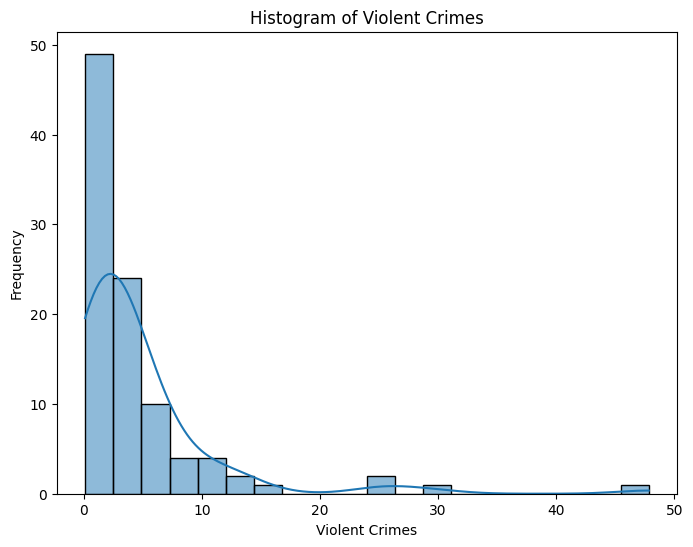

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df['violentcrime2019'], bins=20, kde=True)
plt.title('Histogram of Violent Crimes')
plt.xlabel('Violent Crimes')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Calculate the median of violentcrime2019
median_violentcrime = df['violentcrime2019'].median()

# Binarize GDP based on the median threshold
df['crime_binarized'] = (df['violentcrime2019'] >= median_violentcrime).astype(int)

In [54]:
# Group the dataset by 'crime_binarized'
crime_grouped_data = df.groupby('crime_binarized')

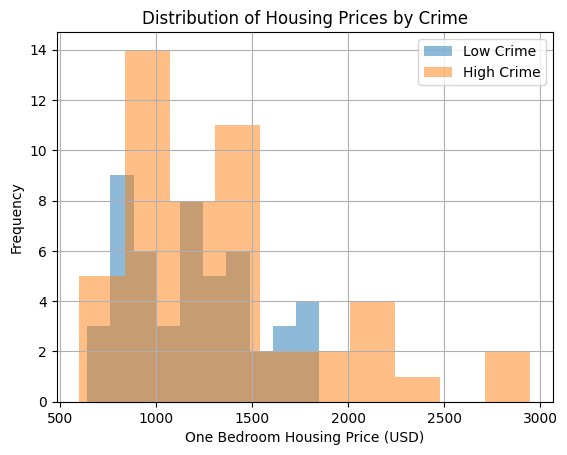

In [55]:
crime_grouped_data['pricesept2021'].hist(alpha=0.5, bins=10)
plt.xlabel('One Bedroom Housing Price (USD)')
plt.ylabel('Frequency')
plt.legend(['Low Crime', 'High Crime'])
plt.title('Distribution of Housing Prices by Crime')
plt.show()

In [56]:
# Select data for crime_binarized = 0 and crime_binarized = 1
low_crime = df[df['crime_binarized'] == 0]['pricesept2021']
high_crime = df[df['crime_binarized'] == 1]['pricesept2021']

# Fit Gaussian to data
low_crime_mu, low_crime_std = norm.fit(low_crime)
high_crime_mu, high_crime_std = norm.fit(high_crime)

# Generate random samples from the Gaussian distributions
low_crime_samples = np.random.normal(low_crime_mu, low_crime_std, 1000)
high_crime_samples = np.random.normal(high_crime_mu, high_crime_std, 1000)

# Subtract the two arrays to get deltas
crime_deltas = high_crime_samples - low_crime_samples

# Fit Gaussian to the delta
crime_mu_delta, crime_std_delta = norm.fit(crime_deltas)

# Calculate probability that for any given house the price increases
crime_probability = 1 - norm.cdf(0, crime_mu_delta, crime_std_delta)

# Print probabilities and means
print(f"Probability: {crime_probability}, Mean: {crime_mu_delta}")

Probability: 0.6143523597764124, Mean: 180.85032444023008


In [57]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load your dataframe here
# df = pd.read_csv('your_file.csv') # Uncomment this line and provide the correct path to your CSV file

# Function to calculate probability and mean for the given condition
def calculate_probability_and_mean_crime(df):
    low_crime = df[df['crime_binarized'] == 0]['pricesept2021']
    high_crime = df[df['crime_binarized'] == 1]['pricesept2021']

    # Fit Gaussian to data
    low_crime_mu, low_crime_std = norm.fit(low_crime)
    high_crime_mu, high_crime_std = norm.fit(high_crime)
    
    # Generate random samples from the Gaussian distributions
    low_crime_samples = np.random.normal(low_crime_mu, low_crime_std, 1000)
    high_crime_samples = np.random.normal(high_crime_mu, high_crime_std, 1000)
    
    # Subtract the two arrays to get deltas
    crime_deltas = high_crime_samples - low_crime_samples
    
    # Fit Gaussian to the delta
    crime_mu_delta, crime_std_delta = norm.fit(crime_deltas)
    
    # Calculate probability that for any given house the price increases
    crime_probability = 1 - norm.cdf(0, crime_mu_delta, crime_std_delta)
    
    return crime_probability, crime_mu_delta

# Run the simulation multiple times
num_simulations = 1000
crime_probabilities = []
crime_means = []

for _ in range(num_simulations):
    prob, mean = calculate_probability_and_mean_crime(df)
    crime_probabilities.append(prob)
    crime_means.append(mean)

# Calculate standard deviation/variance
crime_prob_std = np.std(crime_probabilities)
crime_prob_variance = np.var(crime_probabilities)
crime_mean_std = np.std(crime_means)
crime_mean_variance = np.var(crime_means)

# Print results
print(f"Probability: Mean = {np.mean(crime_probabilities)}, Std Dev = {crime_prob_std}, Variance = {crime_prob_variance}")
print(f"Mean: Mean = {np.mean(crime_means)}, Std Dev = {crime_mean_std}, Variance = {crime_mean_variance}")


Probability: Mean = 0.6003852843633479, Std Dev = 0.012093771847614744, Variance = 0.00014625931750215893
Mean: Mean = 158.94481319681535, Std Dev = 19.172863457944413, Variance = 367.59869317698013


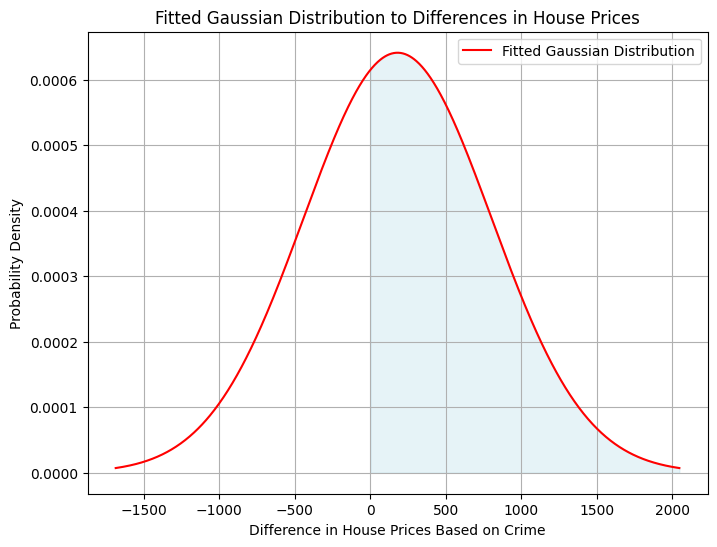

In [58]:
# Generate data points for plotting the fitted Gaussian distribution
crime_x = np.linspace(crime_mu_delta - 3*crime_std_delta, crime_mu_delta + 3*crime_std_delta, 1000)
crime_pdf = norm.pdf(crime_x, crime_mu_delta, crime_std_delta)

# Plot the fitted Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(crime_x, crime_pdf, 'r-', label='Fitted Gaussian Distribution')
plt.xlabel('Difference in House Prices Based on Crime')
plt.ylabel('Probability Density')
plt.title('Fitted Gaussian Distribution to Differences in House Prices')
plt.fill_between(crime_x, crime_pdf, where=(crime_x >= 0), color='lightblue', alpha=0.3)
plt.grid(True)
plt.legend()
plt.show()

### Question 9:

Fill in all the columns of the table below.

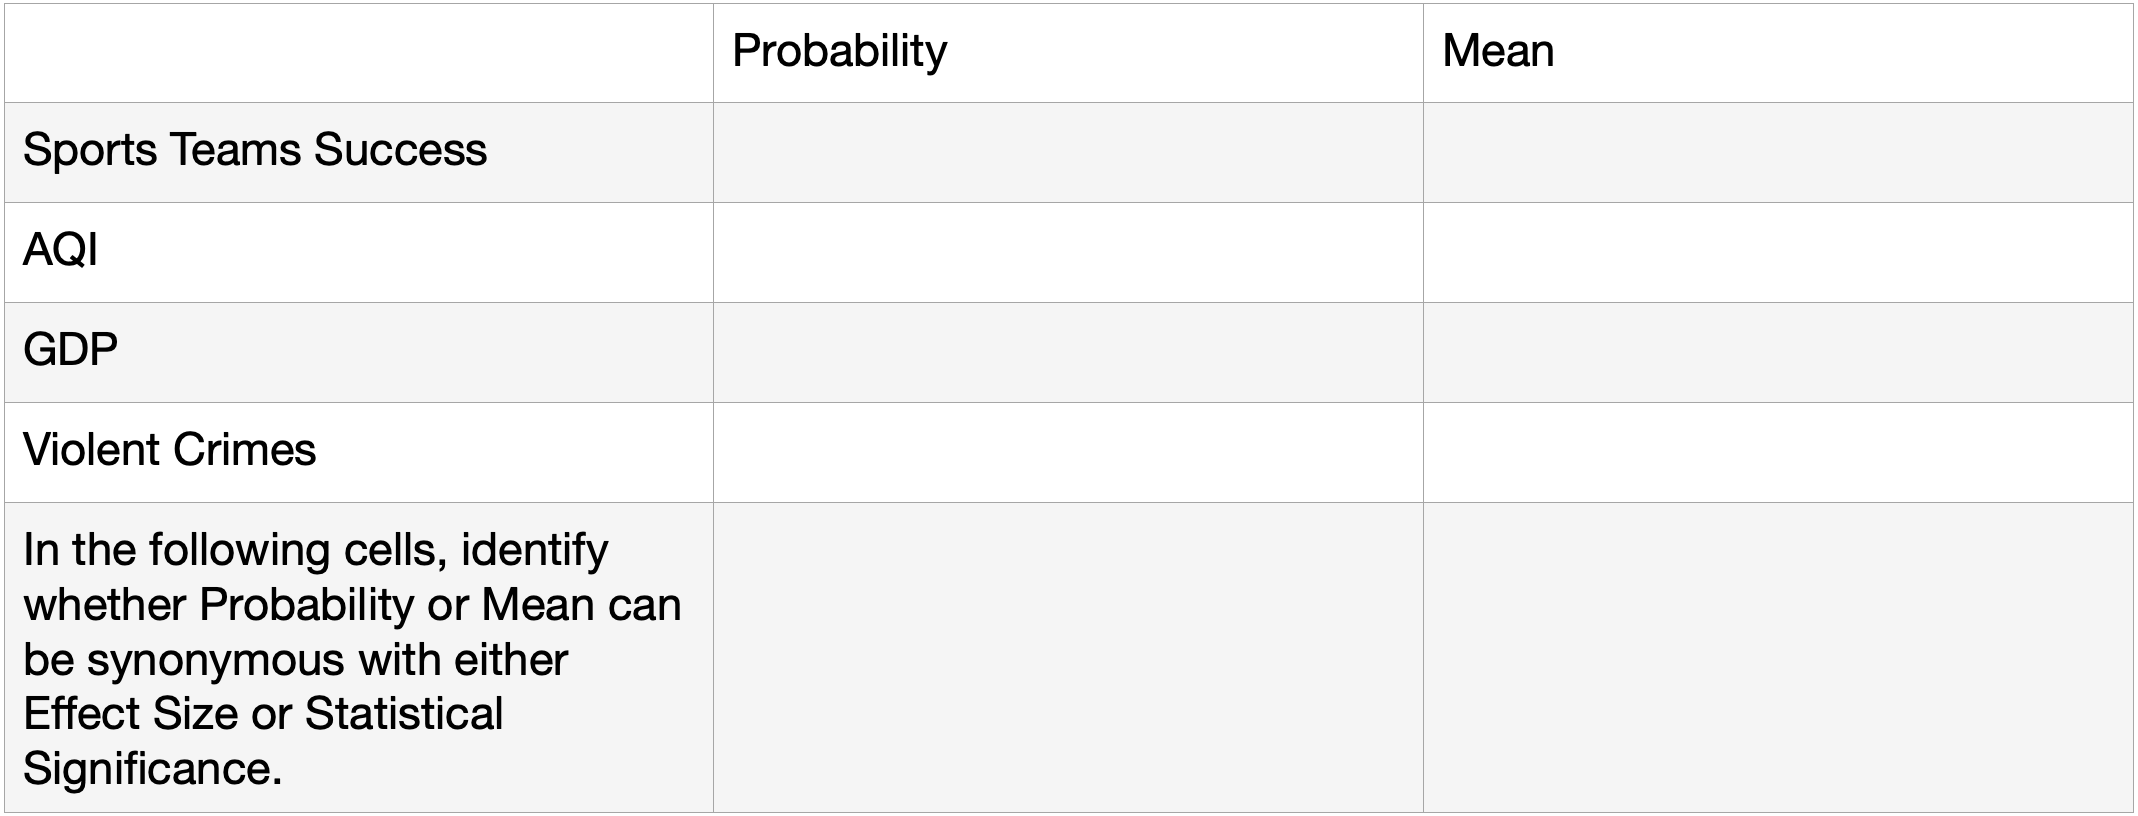

Reminder: the probability represents the increase in housing prices for 1) having at least one winning sports team, 2) having "good" AQI, 3) having "high" GDP, 4) having "high crime" in a given city.

# Investigating 2021 Housing Prices (Part 3)

In Part 2 of our investigation into 2021 housing prices, we delved deeper into several key variables potentially impacting housing markets across 98 US cities: Air Quality Index (AQI), Gross Domestic Product (GDP), and Violent Crimes. For each variable, we analyzed their distribution, classified them into binary categories, and calculated the probability and mean differences in housing prices between these categories.

## Assessing Variable Importance

A policymaker's goal is to prioritize interventions that maximize positive impacts on housing markets. To determine which variables are most influential, we should establish a threshold based on the calculated probabilities. This threshold will help identify variables where the likelihood of a positive impact on housing prices meets or exceeds a predefined level of significance.

## Setting a Threshold

Setting an appropriate threshold for probability is crucial. A higher threshold (e.g., 50% or more) suggests a stronger association between the variable and housing price increases, minimizing the risk of false positives and ensuring that policies are based on robust relationships. Lower thresholds (e.g., below 50%) may still indicate association but might require careful consideration of potential confounding factors and additional validation.

### Question 10:

Write code that produces a scatterplot that graphs the probabilities and means for each variable we analyzed: Sports Team Success, Ice Cream Shops, AQI, GDP, and violent crimes. Using this graph, determine the order of importance for the policymaker to assess how they can best produce a positive impact on housing prices in a given city.

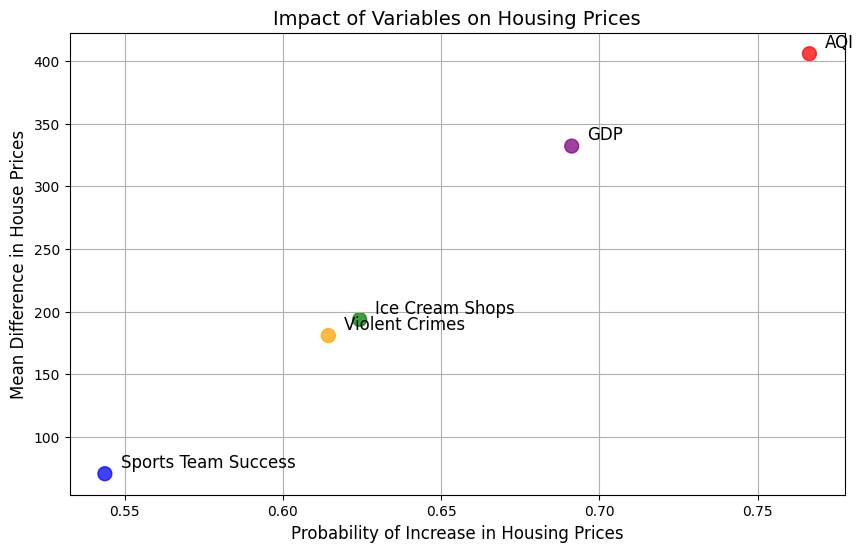

In [95]:
# SOLUTION

variables = ['Sports Team Success', 'Ice Cream Shops', 'AQI', 'GDP', 'Violent Crimes']
probabilities = [ice_cream_probability, aqi_probability, gdp_probability, probability, crime_probability]
means = [ice_cream_mu_delta, aqi_mu_delta, gdp_mu_delta, mu_delta, crime_mu_delta]

# Colors for each variable
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(probabilities, means, color=colors, s=100, alpha=0.75)

for i, var in enumerate(variables):
    plt.text(probabilities[i] + 0.005, means[i] + 5, var, fontsize=12)

# Plot labels and title
plt.xlabel('Probability of Increase in Housing Prices', fontsize=12)
plt.ylabel('Mean Difference in House Prices', fontsize=12)
plt.title('Impact of Variables on Housing Prices', fontsize=14)

plt.grid(True)
plt.show()

##### Write answer here.

### Question 11:

Run the code below to see plots of each variable against housing prices.

Based on your answer to Question 10, the policymaker wants to draft a brief policy that should be proposed to the mayor. Choose the most important variable(s) and draft a brief policy that should be proposed to the mayor.

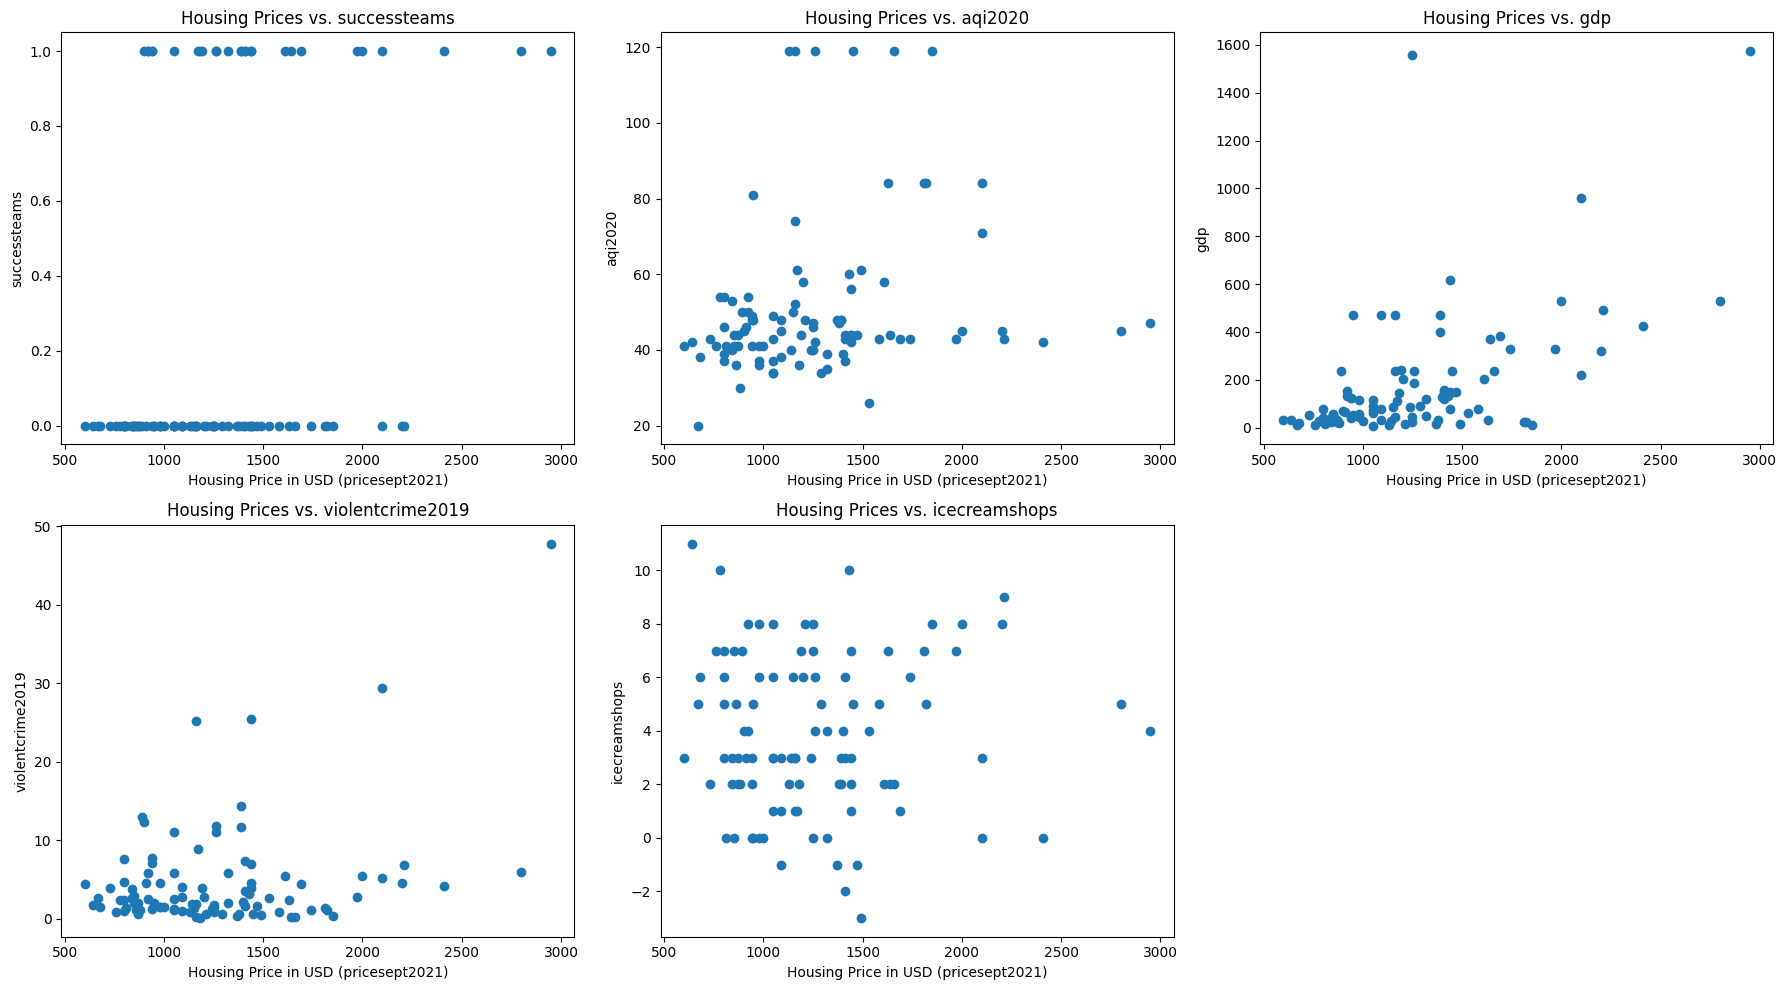

In [132]:
# Variables to plot
variables = ['successteams', 'aqi2020', 'gdp', 'violentcrime2019', 'icecreamshops']

# Create a grid of scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plot each variable against housing prices
for i, var in enumerate(variables):
    axes[i].scatter(df['pricesept2021'], df[var])
    axes[i].set_title(f'Housing Prices vs. {var}')
    axes[i].set_xlabel('Housing Price in USD (pricesept2021)')
    axes[i].set_ylabel(var)

# Remove the empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In Question 10, you plotted the probability and mean values of each variable and used the graph to determine order of importance. However, policymakers often have biases in choosing what to target. With this in mind, is there a different order of variables you would choose to target, from most to least important? If so, why?

From there, propose a policy based on your chosen most important variables.

##### Write your answer here.

### Question 12:

Understanding the directionality of the relationship between variables is crucial in determining causation. [Hill’s criteria](https://sensibility.berkeley.edu/index.php?title=6.2_Hill%27s_Criteria#Definitions-0), particularly the concepts of cause preceding effect (temporality), is an essential tool for assessing this directionality. We can better understand whether changes in a variable like AQI, GDP, or Violent Crimes lead to changes in housing prices, or if the relationship might be influenced by other factors.

a) Can a causal relationship be concluded from our results? If not, what, if anything, can be concluded? How confident are you in this conclusion?

b) How can we ensure that changes in variables such as AQI, GDP, and Violent Crimes precede changes in housing prices? How can we verify the temporal sequence of these changes?

##### Write answer here.